In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                sep=',',
                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'normalized_text_stemm_emoji', 'sentiment']]
df.head()

,created_at,normalized_text_stemm_emoji,sentiment
0,2021-07-04 22:17:21,"[após, fic, silênci, cpi, carl, wizard, retorn...",Positivo
1,2019-11-30 14:35:33,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",Negativo
2,2022-01-11 12:12:28,"[defin, vacin, tip, subst, bactér, introduz, c...",Negativo
3,2019-11-19 14:52:06,"[iphon, segur, contr, ]",Positivo
4,2021-12-28 23:09:10,"[estrag, complet, tud, ]",Negativo


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['input'] = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join([word for word in x]))

vectorizer = CountVectorizer(lowercase=False, min_df=20)
X = vectorizer.fit_transform(df['input'].values)

print(vectorizer.get_feature_names())
print(X.toarray())

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['100200k', '100x', '10h', '10x', '11º', '12h', '15h', '16h', '17h', '18h', '19h', '20h', '21agost', '21h', '22h', '23h', '24h', '24hr', '27º', '40c', '48h', '5h30', '7x1', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'ab', 'aba', 'abaf', 'abaix', 'abal', 'abandon', 'abastec', 'abat', 'abc', 'abel', 'abenço', 'abert', 'abin', 'abism', 'abol', 'abomin', 'abord', 'abort', 'abr', 'abrac', 'abraç', 'abrig', 'abril', 'absolut', 'absolv', 'absurd', 'abus', 'acab', 'academ', 'acadêm', 'acalm', 'acas', 'acat', 'account', 'aceit', 'aceler', 'acentu', 'acerc', 'acert', 'acess', 'ach', 'achat', 'aci', 'acid', 'acim', 'acion', 'acolh', 'acomet', 'acompanh', 'aconselh', 'acontec', 'aconteç', 'acord', 'acostum', 'acr', 'acredit', 'acrescent', 'acumul', 'acus', 'acéfal', 'adapt', 'adept', 'adequ', 'ader', 'ades', 'adeu', 'adi', 'adiant', 'adic', 'adicion', 'adiv', 'adivinh', 'adm', 'administr', 'admir', 'admit', 'ado', 'adoec', 'adolesc', 'ador', 'adot', 'adoç', 'adquir', 'adri', 'adult', 'adv', 'advers', 'adve

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
Y = list(df['sentiment'].replace(['Positivo','Negativo','Neutro'],[1,-1,0]))

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), Y, test_size=0.20, random_state=42)

In [25]:
# Modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [26]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
y_pred = nb.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.667825


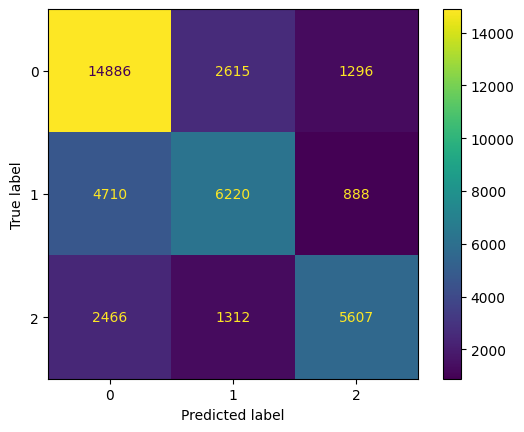

In [29]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.79      0.73     18797
           0       0.61      0.53      0.57     11818
           1       0.72      0.60      0.65      9385

    accuracy                           0.67     40000
   macro avg       0.67      0.64      0.65     40000
weighted avg       0.67      0.67      0.66     40000

